In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("general_data.csv", index_col = "EmployeeID")
df.drop(columns = ["Over18", "EmployeeCount", "StandardHours"], inplace=True)

In [3]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2
4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [5]:
df.describe()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2.063946,65029.312925,2.694830,15.209524,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,1.106689,47068.888559,2.498887,3.659108,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


# Checking NULL Values

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Filling nan values

In [7]:
df.corr()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,-0.002884,-0.044314,0.299243,-0.033137,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,-0.037329,-0.021607,-0.013843,0.038125,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,0.045746,0.006410,-0.016250,-0.040531,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
JobLevel,-0.002884,-0.037329,0.045746,1.000000,0.047316,-0.009875,0.010973,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,0.047316,1.000000,-0.020726,0.004325,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299243,-0.013843,-0.016250,-0.009875,-0.020726,1.000000,0.030860,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667
PercentSalaryHike,-0.033137,0.038125,-0.040531,0.010973,0.004325,0.030860,1.000000,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864
StockOptionLevel,-0.031753,0.011169,0.001261,0.000993,0.026930,0.017163,0.012548,1.000000,0.002694,-0.069902,0.007886,0.019063,0.017757
TotalWorkingYears,0.680661,0.009374,-0.010717,-0.036957,-0.033787,0.238807,-0.018736,0.002694,1.000000,-0.040762,0.627703,0.404444,0.458800
TrainingTimesLastYear,-0.027308,-0.009001,0.010472,-0.032500,0.050112,-0.032286,-0.037392,-0.069902,-0.040762,1.000000,-0.007894,0.016121,-0.013270


In [8]:
print(df[df["TotalWorkingYears"].notnull()].TotalWorkingYears.corr(df[df["TotalWorkingYears"].notnull()]["Age"]))
print(df[df["TotalWorkingYears"].notnull()].TotalWorkingYears.corr(df[df["TotalWorkingYears"].notnull()]["YearsAtCompany"]))
print(df[df["TotalWorkingYears"].notnull()].TotalWorkingYears.corr(df[df["TotalWorkingYears"].notnull()]["YearsWithCurrManager"]))
print(df[df["TotalWorkingYears"].notnull()].TotalWorkingYears.corr(df[df["TotalWorkingYears"].notnull()]["YearsSinceLastPromotion"]))

0.6806613847682979
0.6277031466021691
0.45879953685477176
0.40444441525517855


# Hence as age, YearsAtCompany, YearsWithCurrManager and YearsSinceLastPromotion increases, TotalWorkingYears increases too. Hence we make a linear regression model that predicts the TotalWorkingYears of all missing values

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
y_reg = df[df["TotalWorkingYears"].notnull()]["TotalWorkingYears"]
X_reg = df[df["TotalWorkingYears"].notnull()][["Age", "YearsWithCurrManager", "YearsAtCompany", "YearsSinceLastPromotion"]]
X_test = df[df["TotalWorkingYears"].isnull()][["Age", "YearsWithCurrManager", "YearsAtCompany", "YearsSinceLastPromotion"]]
lin_reg = LinearRegression()
lin_reg.fit(X_reg, y_reg)
lin_reg.score(X_reg, y_reg)

0.6547955527502848

In [11]:
df.loc[df["TotalWorkingYears"].isnull(), "TotalWorkingYears"] = lin_reg.predict(X_test)

In [12]:
df["NumCompaniesWorked"].fillna(df["NumCompaniesWorked"].median(), inplace=True)

In [13]:
df.isnull().sum().sum()

0

# Encoding categorical variables

In [14]:
nom_cat_var = ["Attrition", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"]
travel_mapping = {"Non-Travel": 0, "Travel_Rarely": 1, "Travel_Frequently": 2}
df.BusinessTravel = df.BusinessTravel.map(travel_mapping)

In [15]:
le = LabelEncoder()

In [16]:
for column in nom_cat_var:
    df[column] = le.fit_transform(df[column])

In [17]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,
1,51,0,1,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
2,31,1,2,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
3,32,0,2,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
4,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
5,32,0,1,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


# Checking for any less density extreme outliers

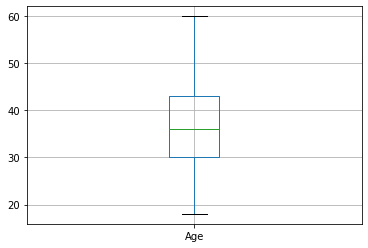

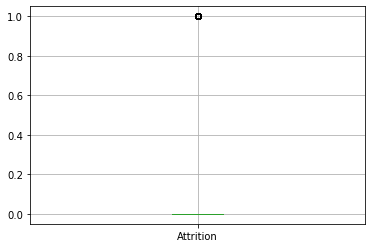

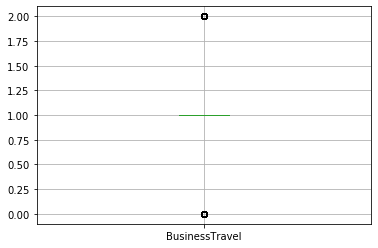

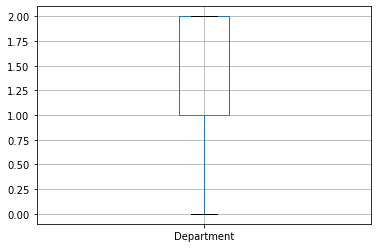

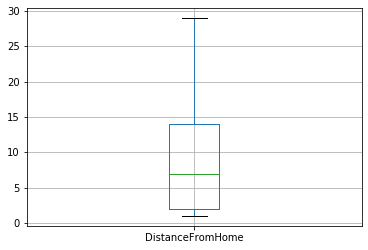

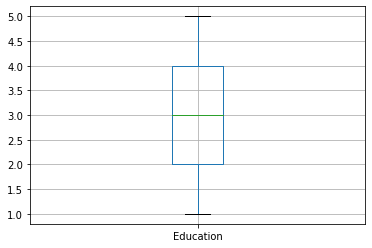

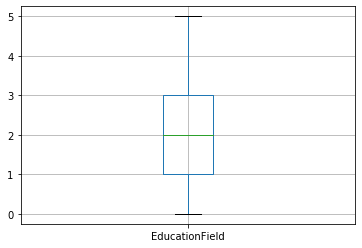

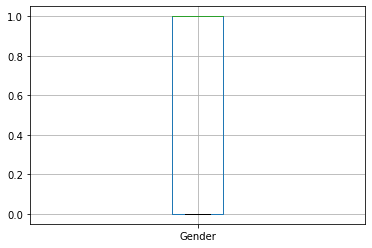

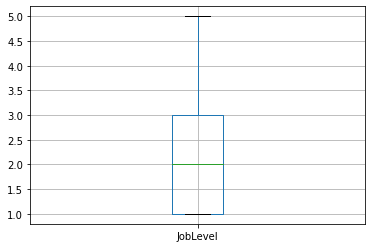

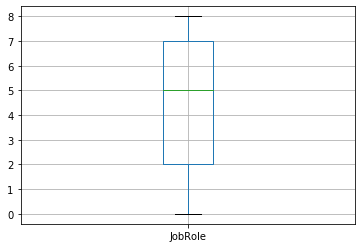

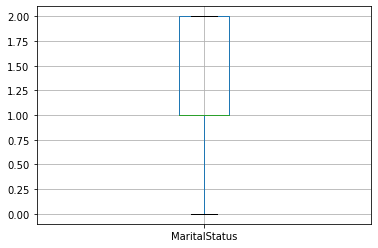

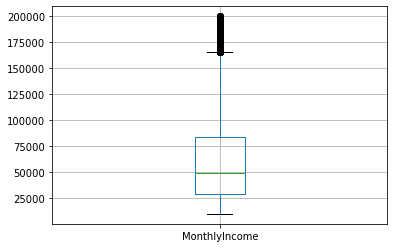

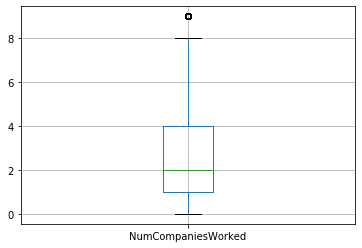

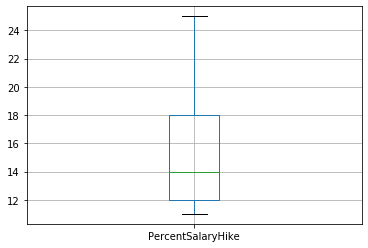

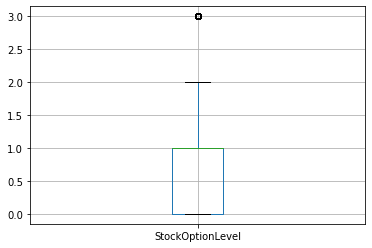

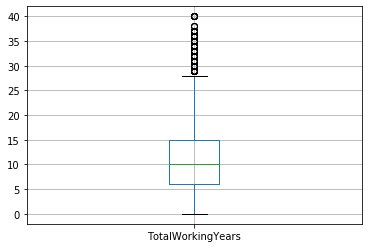

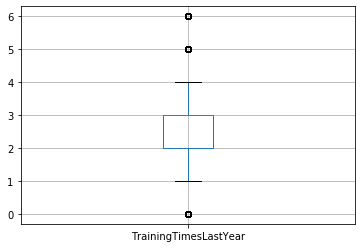

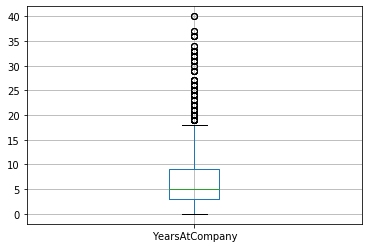

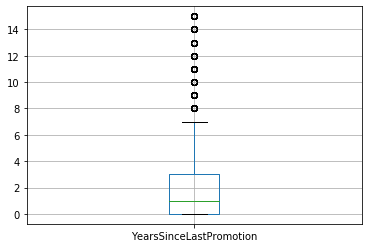

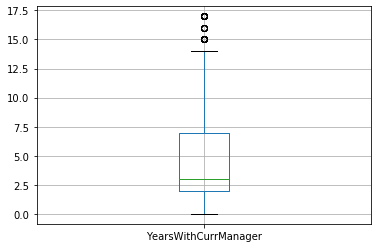

In [18]:
for column in df.columns:
    df.boxplot([column])
    plt.show()

# No unrealistic outlier found

# Splitting independent and dependent variables

In [19]:
y = df[['Attrition']]
X = df[list(set(df.columns) - set(y.columns))]
y = df["Attrition"]

# Now checking which feature significantly affects the dependent variable by using random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
print("Accuracy:", rf.oob_score_)

Accuracy: 1.0


In [23]:
for feature, imp in zip(X.columns, rf.feature_importances_):
    if imp*100 >= 6:
        print(feature, imp*100, '%')

PercentSalaryHike 6.583042353151644 %
TotalWorkingYears 8.411485415775271 %
YearsAtCompany 6.943384470116423 %
Age 9.798866477783019 %
MonthlyIncome 9.480742785917 %
DistanceFromHome 6.921453543279654 %


In [24]:
features = ["Age", "MonthlyIncome", "TotalWorkingYears", "DistanceFromHome", "YearsAtCompany", "PercentSalaryHike"]
X = df[features]

# From the above we can see that the person's age, monthly income are important features out of all 

# Now we will make a decision tree model

In [25]:
model = DecisionTreeClassifier(max_leaf_nodes = 20)
# limitations on max leaf node to make simple rules, but this reduces accuracy
#otherwise accuracy is 100%
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
print("Accuracy:", model.score(X, y))
#Accuracy decreased due to limitations of max number of leaf nodes

Accuracy: 0.8721088435374149


In [27]:
with open("Dtree.dot", 'w') as f:
    f = tree.export_graphviz(model,feature_names = features, out_file=f);

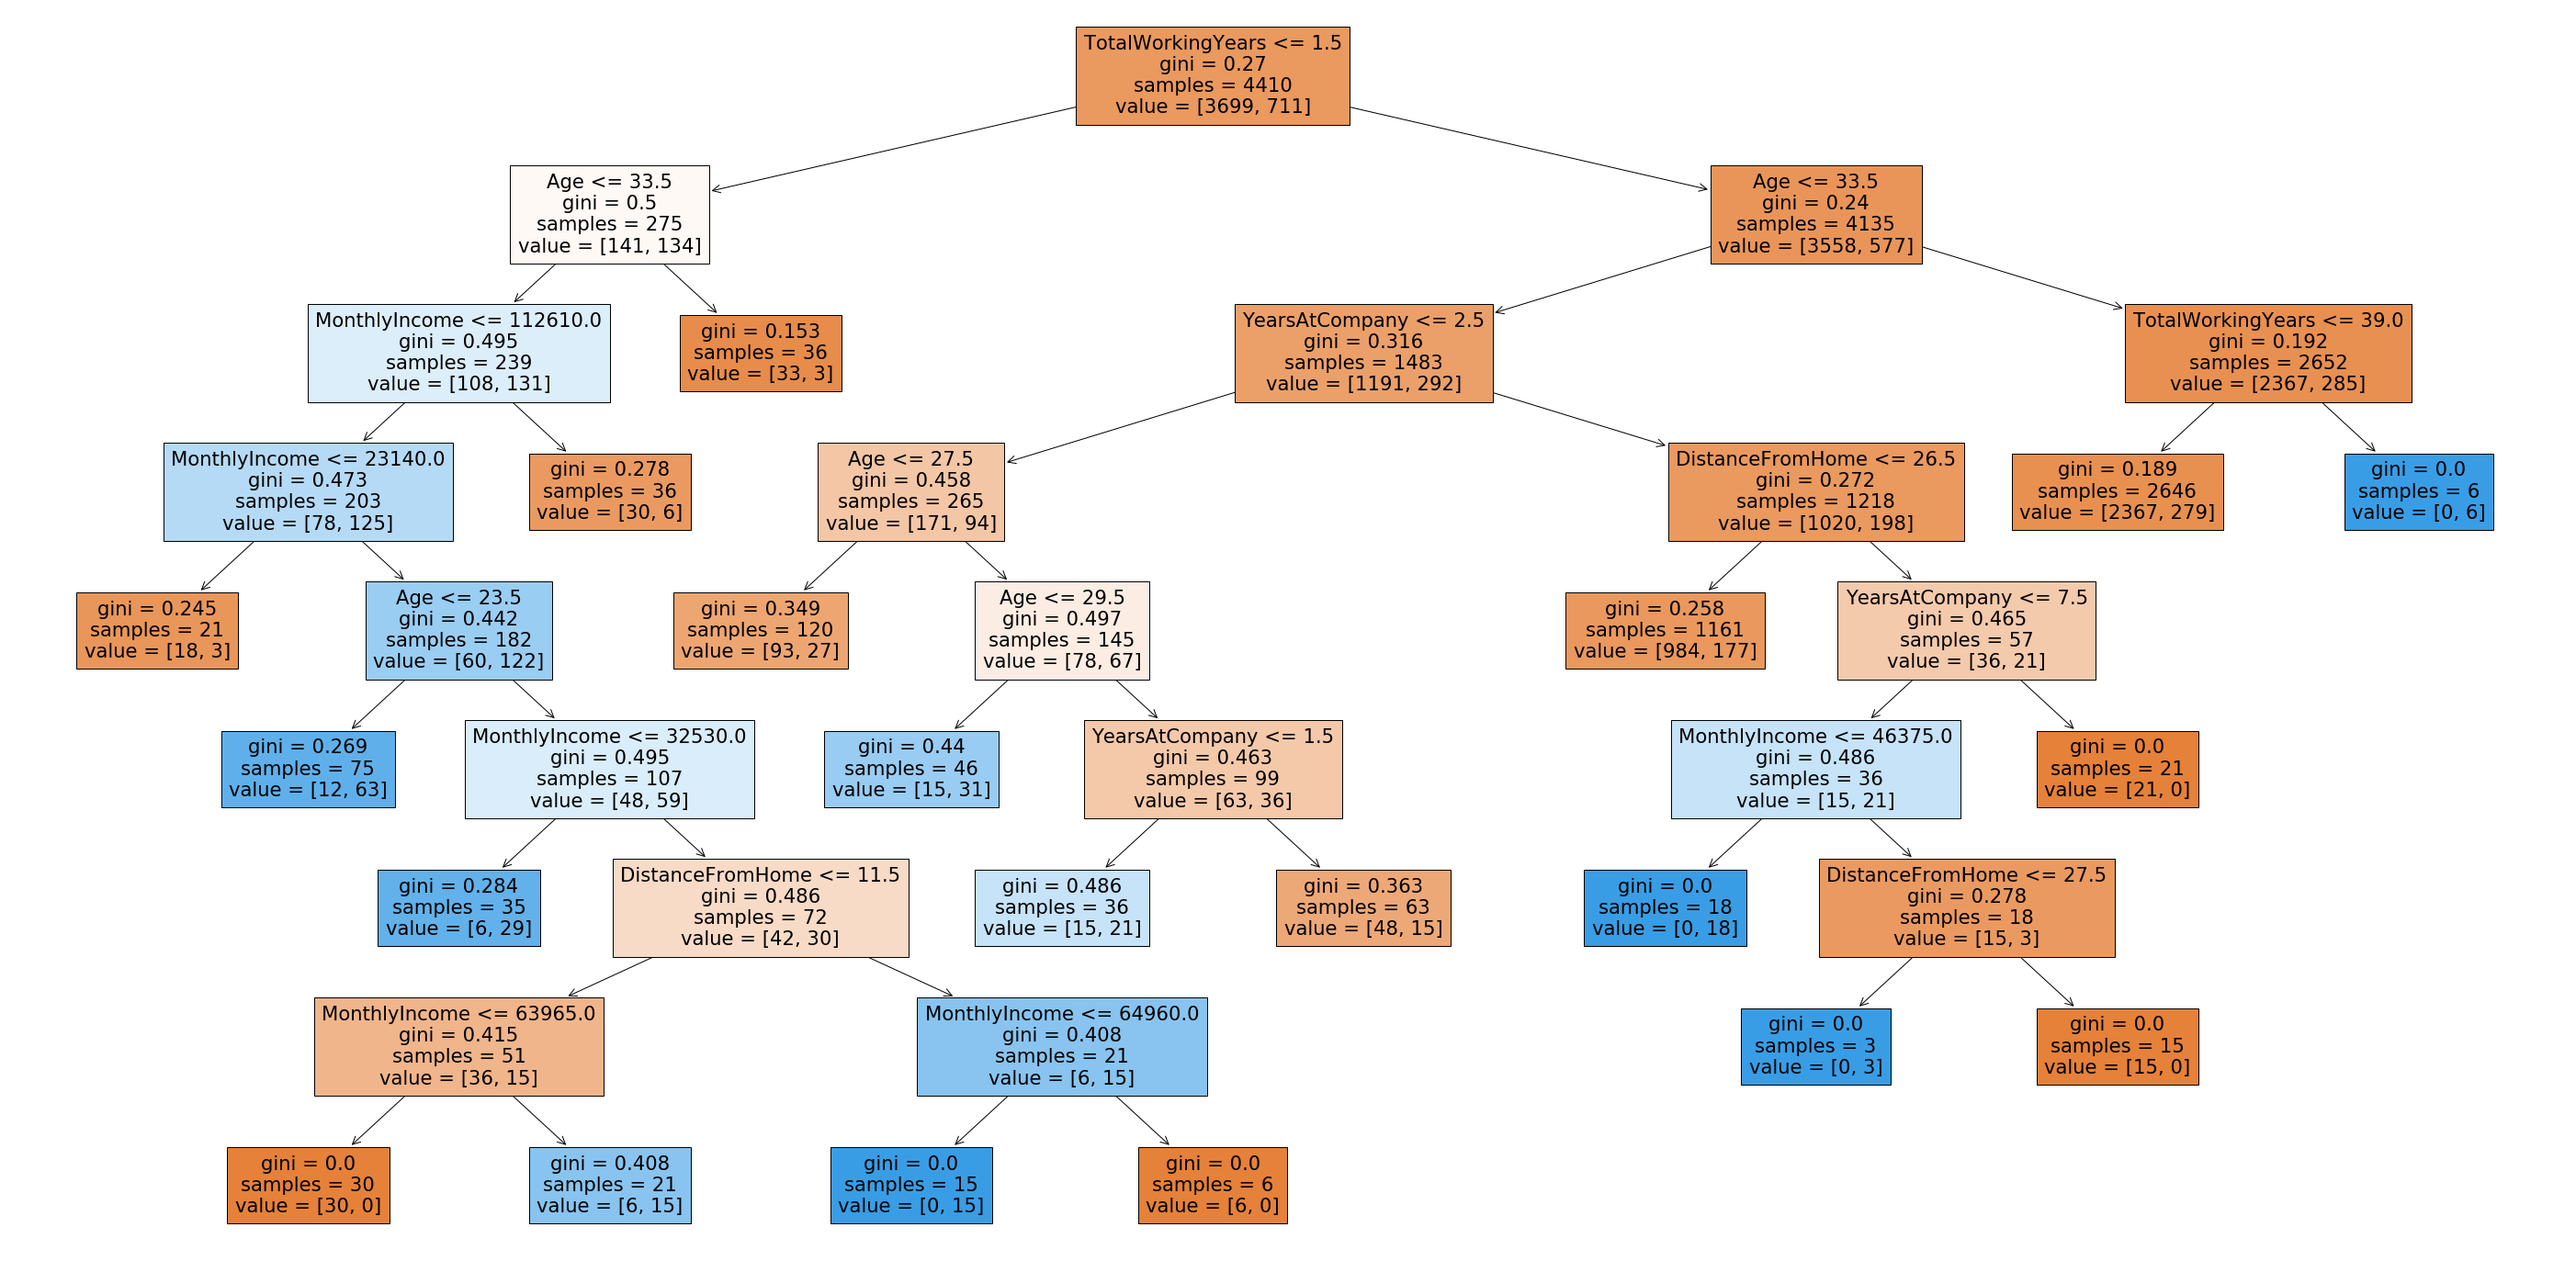

In [28]:
fig = plt.figure(figsize = (50, 25))
_=tree.plot_tree(model, feature_names = features, filled=True)

# The decision tree model makes the following rules:    


In [ ]:
<h2>Stayed in company</h2>
<ul>
    <li>If person's total working years is less than or equal to 1.5, age is from 23.5 to 33.5, monthly income is from 32530 to 63965 and distance from home is less than or equal to 11.5</li>
    <li>If person's total working years is less than or equal to 1.5, age is from 23.5 to 33.5, monthly income is from 64960 to 112610 and distance from home is less than or equal to 11.5</li>
    <li>If person's total working years is greater than 1.5, age is less than or equal to 33.5, years at company is greater than 7.5 and distance from home is greater than 26.5</li>
    <li>A person who's education is greater than 2.5, ZIP code is lower than or equal to 93772.5, family is less than or equal to 2.5, income is from 92.5 to 113.5, CD Account greater than 0.5 and CCAvg is from 2.95 to 3.7</li>
    <li>A person who's income is from 92.5 to 113.5, CCAvg is greater than 3.45, CD account is lower than or equal to 0.5, eduaction and family is greater than 1.5 and 2.5 repectively</li>
    <li>A person who's income is greater than 113.5, education lower than or equal to 1.5, family greater than 2.5</li>
    <li>A person who's income is greater than 116.5, education greater than 1.5</li>
    <li>A person who's income is from 113.5 to 116.5, education greater than 1.5, CCAvg lower tha equal to 2.15, Zip code greater than 94807</li>
</ul>
<h2>Left company</h2>
<ul>
    <li>If person's total working years is less than or equal to 1.5, age is from 23.5 to 33.5, monthly income is from 32530 to 64960, distance from home is less than or equal to 11.5</li>
    <li>If person's total working years is from 1.5 to 39 and age is greater than 33.5</li>
    <li>If person's total working years is greater than 1.5, age is less than or equal to 33.5, years at company is from 2.5 to 7.5, monthly income is less than 46375 and distance from home is greater than 26.5</li>
    <li>>If person's total working years is greater than 1.5, age is less than or equal to 33.5, years at company is from 2.5 to 7.5, monthly income is greater than 46375 and distance from home is from 26.5 to 27.5</li>
</ul>